In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [12]:
df= pd.read_excel("Bike_Sales.xlsx")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


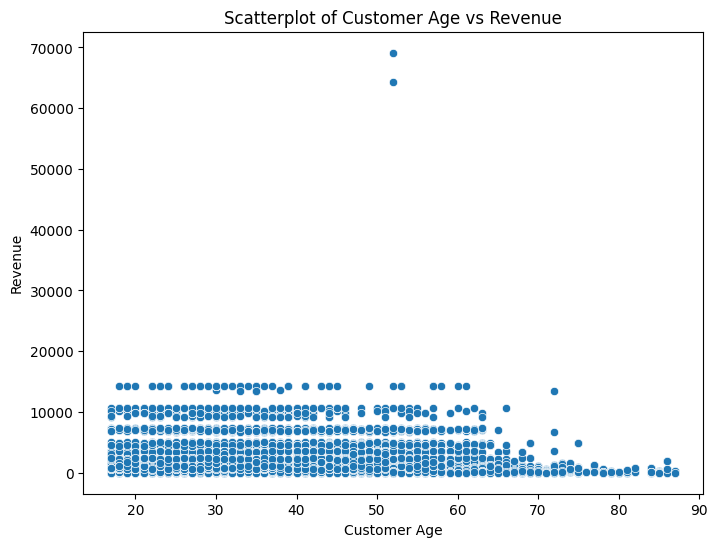

In [16]:


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Customer_Age', y='Revenue')
plt.title('Scatterplot of Customer Age vs Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.show()


In [ ]:
#Spearman correlation between Customer_Age and Revenue
spearman_corr = df['Customer_Age'].corr(df['Revenue'], method='spearman')
print(f"Spearman correlation between customer_age and revenue: {spearman_corr:.3f}")


Spearman correlation between customer_age and revenue: 0.018


In [ ]:
#correlation matrix for Customer_Age and Revenue
corr_matrix = df[['Customer_Age', 'Revenue']].corr(method='spearman')
print(corr_matrix)


              Customer_Age   Revenue
Customer_Age      1.000000  0.017697
Revenue           0.017697  1.000000


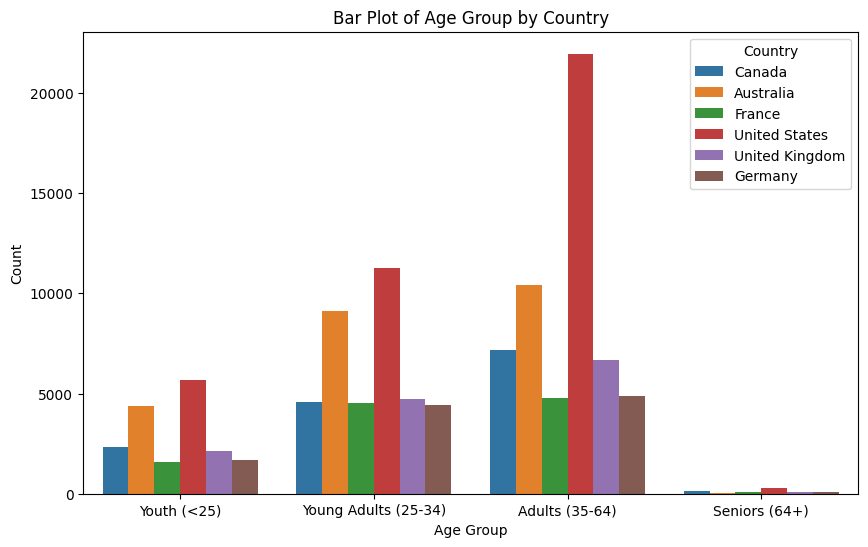

In [30]:
#Categorical vs Categorical
#Bar plot for Age_Group by Country

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age_Group', hue='Country')
plt.title('Bar Plot of Age Group by Country')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Country')
plt.show()



In [32]:
# Categorical vs Categorical: Chi-square test for Age_Group and Country
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Age_Group'], df['Country'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test between Age_Group and State:")
print(f"Chi2 statistic: {chi2:.3f}, p-value: {p:.3f}")

Chi-square test between Age_Group and State:
Chi2 statistic: 1638.515, p-value: 0.000


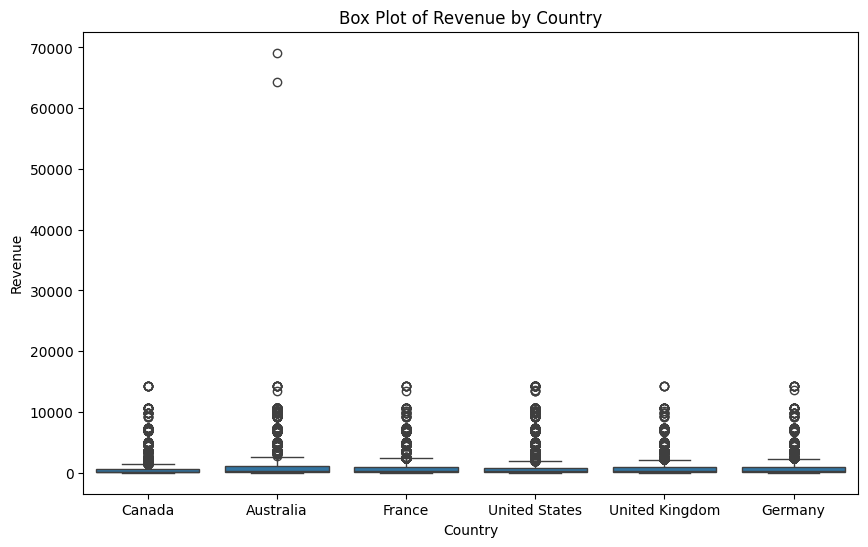

In [ ]:
#Categorical vs Continous

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Country', y='Revenue')
plt.title('Box Plot of Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()


In [26]:
# Categorical vs Continuous: ANOVA test for Revenue by Country
from scipy.stats import f_oneway

groups = [df[df['Country'] == country]['Revenue'] for country in df['Country'].unique()]
anova_result = f_oneway(*groups)
print("ANOVA test for Revenue across Country groups:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3f}")

ANOVA test for Revenue across Country groups:
F-statistic: 230.152, p-value: 0.000
